In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
df2019 = pd.read_excel("../Adatok/2019_merged_matekA1A2_cleaned.xlsx")
df2020 = pd.read_excel("../Adatok/Áltkémes zh nélküli 2020.xlsx")
df2021 = pd.read_excel("../Adatok/2021_merged_with_zh_clean.xlsx")

In [4]:
df2019 = df2019.drop(['Name', 'Neptun'], axis=1) #irreleváns oszlopokat eltávolítjuk
df2020 = df2020.drop(['Name', 'Neptun', 'Postcode', 'idő'], axis = 1)
df2021 = df2021.drop(['Name', 'Neptun', 'Postcode', 'idő'], axis = 1)

In [5]:
min_max_scaler = MinMaxScaler()

In [6]:
df2019['Össz eredmény (átlag)'] = (df2019['Össz eredmény (átlag)'].str.rstrip('%')).str.replace(',','.').astype('float')

In [7]:
df2019['Kognitív pont'] = df2019['Kognitív pont'].str.replace(',','.').astype('float')

In [8]:
df2021[['Összpontszám', 'Tanulmányi pont', 'Érettségi pont', 'Többletpont', 'ZH0', 'elért pontszám', 'Kognitív pont']] = min_max_scaler.fit_transform(df2021[['Összpontszám', 'Tanulmányi pont', 'Érettségi pont', 'Többletpont', 'ZH0', 'elért pontszám','Kognitív pont']])
df2020[['Tanulmányi pont', 'Érettségi pont', 'Többletpont','Összes pont']] = min_max_scaler.fit_transform(df2020[['Tanulmányi pont', 'Érettségi pont', 'Többletpont','Összes pont']])
df2019[['ZH0', 'Tanulmányi pont', 'Érettségi pont', 'Többletpont', 'Összes pont', 'Kognitív pont', 'Össz eredmény (átlag)']] = min_max_scaler.fit_transform(df2019[['ZH0', 'Tanulmányi pont', 'Érettségi pont', 'Többletpont', 'Összes pont', 'Kognitív pont', 'Össz eredmény (átlag)']])

Tekintsük a 2021-es adatokat az alapján, hogy milyen oktatás folyt náluk a vírushelyzet alatt!
3 különböző lehetőség volt, illetve néhány hallgatónál egyéb áll a cellában, az utóbbiakat nem vizsgáljuk, ugyanis nem tudjuk a hátteret. Előtte még skáláztuk az adatokat min-max módon, de még amikor egyben voltak, másképp torzítást kaptunk volna.

In [9]:
df21_online = df2021[df2021['12_ora_tipus'] == 'Online oktatás folyt a teljes időszakban']
df21_hazi = df2021[df2021['12_ora_tipus'] == 'Rendszeresen kaptunk feladatokat, amiket határidőre visszaküldtünk']
df21_semmi = df2021[df2021['12_ora_tipus'] =='Szinte semmilyen kommunikáció nem volt a matektanárunk és közöttünk']

online: sok eset; feladat küldözgetős: 21 eset, nem sok de nem is kevés; semmilyen kommunikáció: 5 eset, nem túl reprezentatív, ezért nem nézzük meg. Több ábrát készítettem, egyik sem lett informatív, sajnos nincs elég adat nem online lefolyású órákról, lehetne egyesíteni a többit, idő kérdése, hogy belefér-e a vizsgálódásainkba.

In [10]:
len_online = range(len(df21_online['12_ora_tipus']))

Nézzünk szórásdiagramokat arra vonatkozóan, hogy a felvételi pontszám hogyan viszonyul más eredményekhez, illetve ezt színezzük emelt érettségi megléte és természettudományi tagozat alapján.

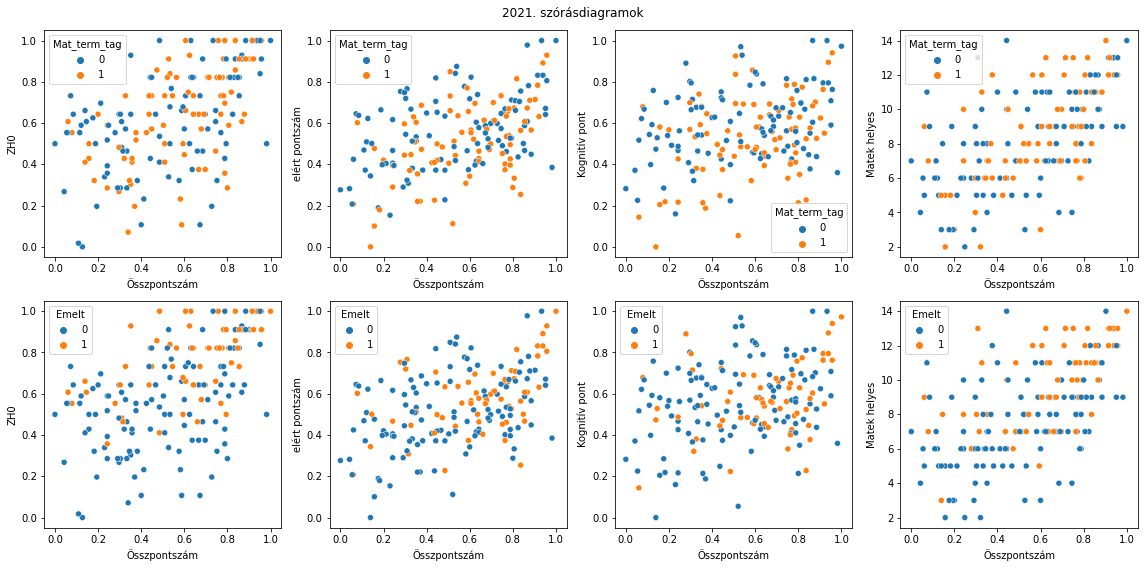

In [15]:
fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(nrows=2, ncols=4)
fig.suptitle('2021. szórásdiagramok')

ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'ZH0', hue = 'Mat_term_tag')
         
ax1 = fig.add_subplot(gs[0,1])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'elért pontszám', hue = 'Mat_term_tag')

ax2 = fig.add_subplot(gs[0,2])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'Kognitív pont', hue = 'Mat_term_tag')

ax3 = fig.add_subplot(gs[0,3])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'Matek helyes', hue = 'Mat_term_tag')

ax4 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'ZH0', hue = 'Emelt')
         
ax5 = fig.add_subplot(gs[1,1])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'elért pontszám', hue = 'Emelt')

ax6 = fig.add_subplot(gs[1,2])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'Kognitív pont', hue = 'Emelt')

ax7 = fig.add_subplot(gs[1,3])
sns.scatterplot(data = df2021, x = 'Összpontszám', y = 'Matek helyes', hue = 'Emelt')

plt.tight_layout()
plt.show()

Ábrákhoz megjegyzések: (spoiler alert) a korábbi évekhez képest az emelt érettséginek nincs akkora megkülönböztető ereje, továbbra is jobbak az emeltesek, de a lentebb lévő ábrákon sokkal nyilvánvalóbb a különbség. Sőt olyan furcsaság is megmutatkozik a 2. és 3. ábrán, hogy a tagozatosok rosszabban teljesítettek összességben és a kognitív részben, aminek nehéz magyarázatot adni vagy akár csak elképzelni. A lenti ábrákhoz képest ráadásul a szórások is jóval nagyobbak, a javuló trend sokkal gyengébben látszik.

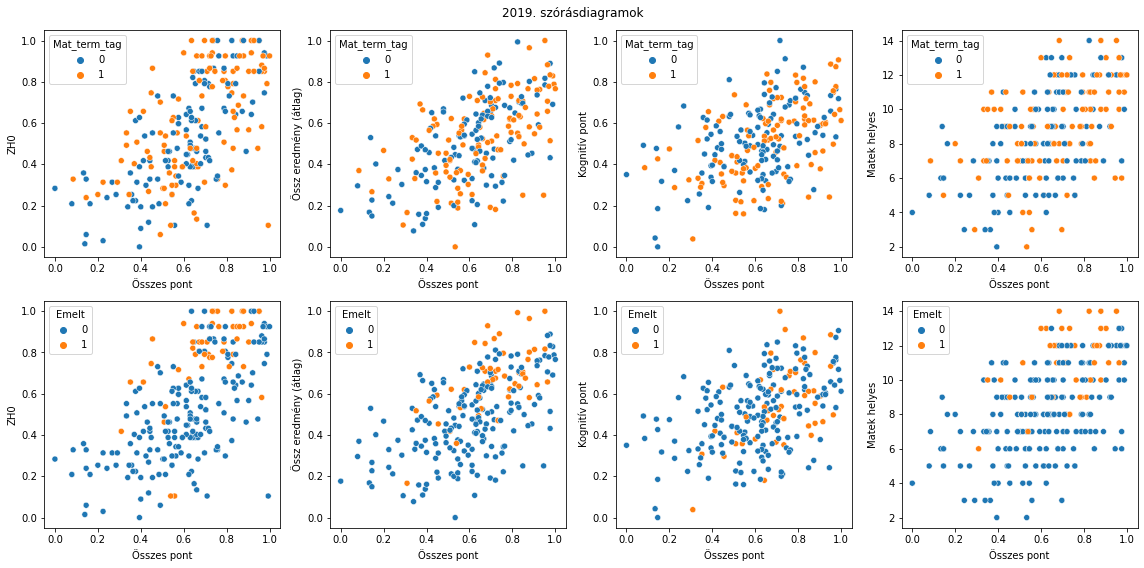

In [16]:
fig19 = plt.figure(figsize=(16, 8)) 
gs19 = gridspec.GridSpec(nrows=2, ncols=4)
fig19.suptitle('2019. szórásdiagramok')

ax0 = fig19.add_subplot(gs19[0, 0])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'ZH0', hue = 'Mat_term_tag')
         
ax1 = fig19.add_subplot(gs19[0,1])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'Mat_term_tag')

ax2 = fig19.add_subplot(gs19[0,2])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Kognitív pont', hue = 'Mat_term_tag')

ax3 = fig19.add_subplot(gs19[0,3])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Matek helyes', hue = 'Mat_term_tag')

ax4 = fig19.add_subplot(gs19[1, 0])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'ZH0', hue = 'Emelt')
         
ax5 = fig19.add_subplot(gs19[1,1])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'Emelt')

ax6 = fig19.add_subplot(gs19[1,2])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Kognitív pont', hue = 'Emelt')

ax7 = fig19.add_subplot(gs19[1,3])
sns.scatterplot(data = df2019, x = 'Összes pont', y = 'Matek helyes', hue = 'Emelt')

plt.tight_layout()
plt.show()

Tapasztalatok az ábrák alapján: lineáris trendek látszódnak a ponthalmazokon, azaz a sikeresebb felvételizők ügyesebbek voltak a felméréseken, bár a szórás jelentős. Ami biztos, hogy az emelt érettségizők a nulladik zh-n, a teszt matematikai részén és összességben jobbak voltak, de a kognitív eredményüket tekintve nem teljesítettek kimagaslóan. A tagozat alapján nem nagyon lehet megkülönböztetni az eredményeket.

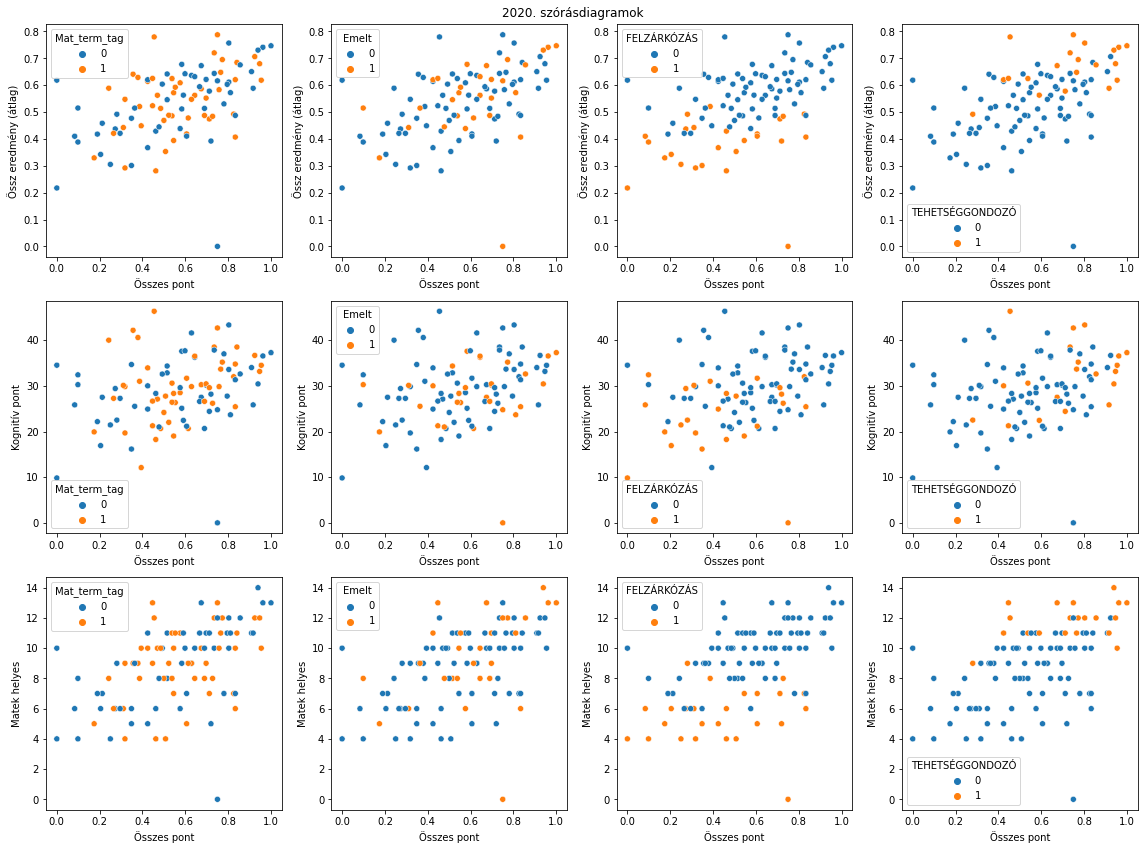

In [19]:
fig20 = plt.figure(figsize=(16, 12)) 
gs20 = gridspec.GridSpec(nrows=3, ncols=4)
fig20.suptitle('2020. szórásdiagramok')

ax0 = fig20.add_subplot(gs20[0, 0])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'Mat_term_tag')
         
ax1 = fig20.add_subplot(gs20[0,1])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'Emelt')

ax2 = fig20.add_subplot(gs20[0,2])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'FELZÁRKÓZÁS')

ax3 = fig20.add_subplot(gs20[0,3])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Össz eredmény (átlag)', hue = 'TEHETSÉGGONDOZÓ')

ax4 = fig20.add_subplot(gs20[1, 0])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Kognitív pont', hue = 'Mat_term_tag')
         
ax5 = fig20.add_subplot(gs20[1,1])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Kognitív pont', hue = 'Emelt')

ax6 = fig20.add_subplot(gs20[1,2])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Kognitív pont', hue = 'FELZÁRKÓZÁS')

ax7 = fig20.add_subplot(gs20[1,3])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Kognitív pont', hue = 'TEHETSÉGGONDOZÓ')

ax8 = fig20.add_subplot(gs20[2, 0])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Matek helyes', hue = 'Mat_term_tag')
         
ax9 = fig20.add_subplot(gs20[2,1])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Matek helyes', hue = 'Emelt')

ax10 = fig20.add_subplot(gs20[2,2])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Matek helyes', hue = 'FELZÁRKÓZÁS')

ax11 = fig20.add_subplot(gs20[2,3])
sns.scatterplot(data = df2020, x = 'Összes pont', y = 'Matek helyes', hue = 'TEHETSÉGGONDOZÓ')

plt.tight_layout()
plt.show()

Tapasztalatok az ábrák alapján: erősen látszik, hogy azon hallgatók eredményei lettek jobbak, akik nem vették igénybe a felzárkóztató lehetőségeket (nem volt rá szükségük), illetve akik tehetséggondozó foglalkozásokon vettek részt. Az emelt érettségisek kognitív részben a többiekhez hasonlóan, bár kisebb szórással teljesítettek (lehet, hogy a matematikára való ráfókuszáltság okozza), azonban összességben és a matekos részben jobbak voltak. A természettudományi tagozat ezeken az ábrákon nem mutat befolyást az eredményre. Az ábrák összességben mutatnak enyhe lineáris összefüggést a felvételi pontszám, és az eredmények között, együtt növekednek.

Most nézzük meg, hogy 2019 legjobb tanulói milyen eredményeket értek ek a 0. zhn és a teszten. Kicsit csalóka, mert a tárgyakat később teljesítették, mint a felméréseket.

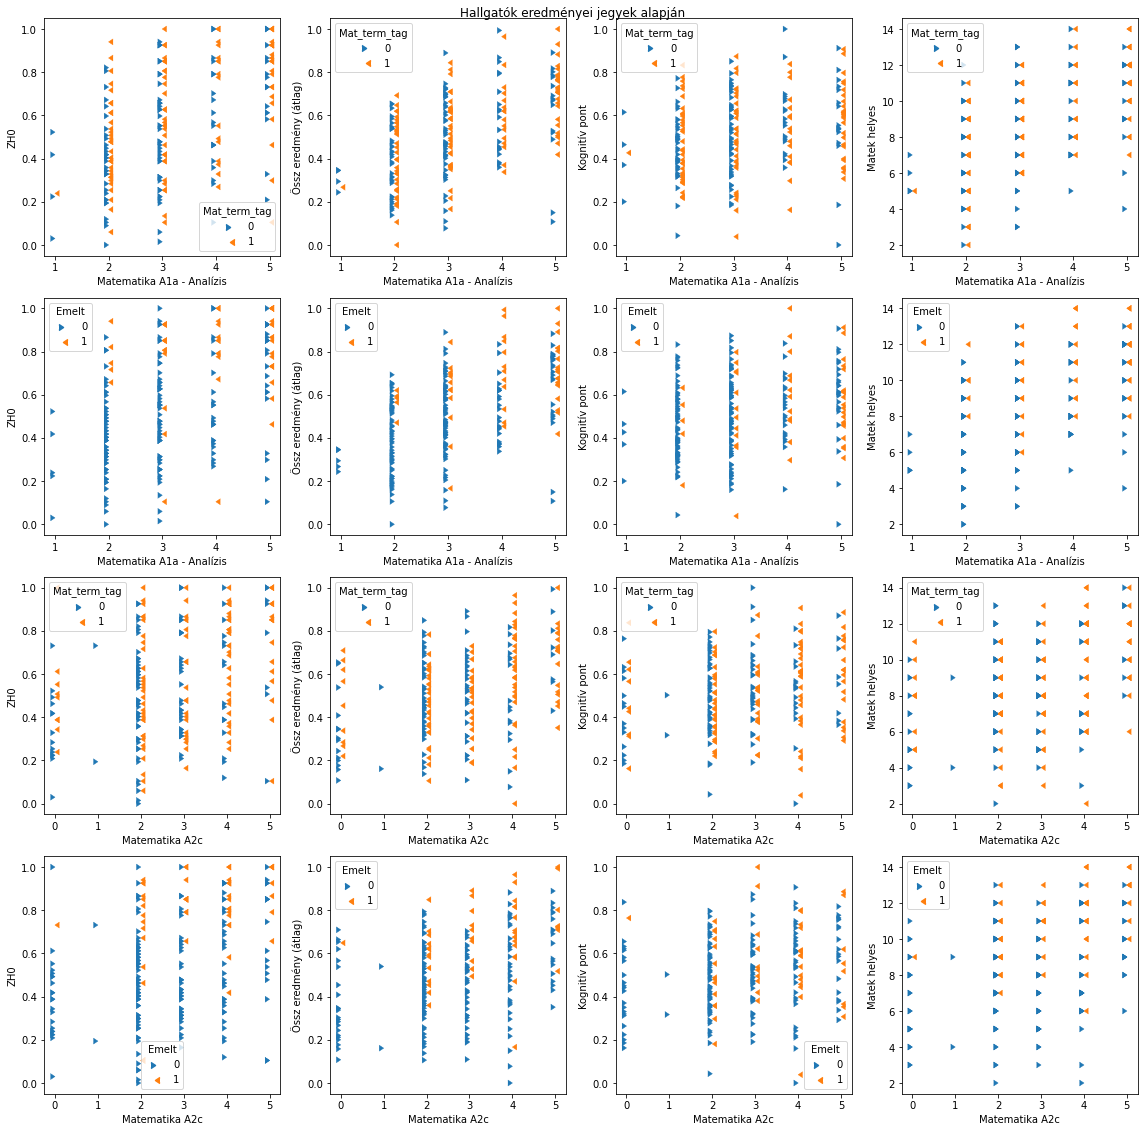

In [28]:
figa1a2 = plt.figure(figsize=(16, 16)) 
gsa1a2 = gridspec.GridSpec(nrows=4, ncols=4)
figa1a2.suptitle('Hallgatók eredményei jegyek alapján')

markers = {1: 4, 0: 5}

ax0 = figa1a2.add_subplot(gsa1a2[0, 0])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'ZH0', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)
         
ax1 = figa1a2.add_subplot(gsa1a2[0,1])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Össz eredmény (átlag)', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax2 = figa1a2.add_subplot(gsa1a2[0,2])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Kognitív pont', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax3 = figa1a2.add_subplot(gsa1a2[0,3])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Matek helyes', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax4 = figa1a2.add_subplot(gsa1a2[1, 0])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'ZH0', hue = 'Emelt', style = 'Emelt', markers = markers)
         
ax5 = figa1a2.add_subplot(gsa1a2[1,1])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Össz eredmény (átlag)', hue = 'Emelt', style ='Emelt', markers = markers)

ax6 = figa1a2.add_subplot(gsa1a2[1,2])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Kognitív pont', hue = 'Emelt', style = 'Emelt', markers = markers)

ax7 = figa1a2.add_subplot(gsa1a2[1,3])
sns.scatterplot(data = df2019, x = 'Matematika A1a - Analízis', y = 'Matek helyes', hue = 'Emelt', style = 'Emelt', markers = markers)

ax8 = figa1a2.add_subplot(gsa1a2[2, 0])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'ZH0', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)
         
ax9 = figa1a2.add_subplot(gsa1a2[2,1])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Össz eredmény (átlag)', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax10 = figa1a2.add_subplot(gsa1a2[2,2])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Kognitív pont', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax11 = figa1a2.add_subplot(gsa1a2[2,3])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Matek helyes', hue = 'Mat_term_tag', style = 'Mat_term_tag', markers = markers)

ax12 = figa1a2.add_subplot(gsa1a2[3, 0])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'ZH0', hue = 'Emelt', style = 'Emelt', markers = markers)
         
ax13 = figa1a2.add_subplot(gsa1a2[3,1])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Össz eredmény (átlag)', hue = 'Emelt', style = 'Emelt', markers = markers)

ax14 = figa1a2.add_subplot(gsa1a2[3,2])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Kognitív pont', hue = 'Emelt', style = 'Emelt', markers = markers)

ax15 = figa1a2.add_subplot(gsa1a2[3,3])
sns.scatterplot(data = df2019, x = 'Matematika A2c', y = 'Matek helyes', hue = 'Emelt', style = 'Emelt', markers = markers)

plt.tight_layout()
plt.show()

Tapasztalatok: egy olyan tendenciát mutatnak az ábrák, hogy akik jobb jegyet szereztek, nagyobb valószínűséggel értek el jobb eredményeket, de nem annyira határozott a trend. Minden jegy esetében nagy a szórás, általánosan a hármasok és négyesek körében a legnagyobb, de például az A2-ZH0 ábrán a ketteseknek volt a legnagyobb. Tovább igazodik az a mintázat, hogy azok, akik emelt érettségit tettek matematikából, határozottan jobb eredményt értek el a kognitív részen kívül minden felmérésben. A kognitív rész esetén is kicsit jobbak voltak, de nem kiugróan. Továbbá alig van olyan emeltes, aki nem tudta teljesíteni a tárgyakat, viszont az A2 alapú ábráknál figyelembe kell venni, hogy akinél 0 van, az szimplán nem vette fel a tárgyat, nem tudjuk hogyan teljesített volna, de nem árt, ha tudunk róluk is. Döntő többségben egyébként középfokúsok nem vették fel az A2-t. Ezek az ábrák továbbra alátámasztják, hogy a természettudományi tagozaton való részvétel nem befolyásolta jelentősen az eredményeket.